In [36]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
# compare inflation, GDP, and unemployment in the US and Europe

# Get US unemployment (U-3) from the BLS
us_unemployment_df = pd.read_csv('../data/us-unemployment-rate.csv',
                                index_col=0, 
                                names=['date', 'us_unemployment'],
                                header=0,
                                parse_dates=[0])
us_unemployment_df.head()

,us_unemployment
date,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [3]:
# Find how much unemployment changes from month to month.

us_unemployment_df.diff()

,us_unemployment
date,
1948-01-01,NaN
1948-02-01,0.4
1948-03-01,0.2
1948-04-01,-0.1
1948-05-01,-0.4
...,...
2021-11-01,-0.4
2021-12-01,-0.3
2022-01-01,0.1


In [16]:
# In which month do we see the greatest rise, on average, in unemployment?
us_unemployment_df.diff().groupby(us_unemployment_df.index.month).mean().sort_values('us_unemployment')

,us_unemployment
date,
8,-0.033784
5,-0.028378
9,-0.027027
7,-0.024324
11,-0.014865
6,-0.013514
2,-0.006667
1,-0.004054
12,0.001351


In [21]:
# If we only look at data starting in the year 1990, does this hold?
us_unemployment_df['1990':].diff().groupby(us_unemployment_df['1990':].index.month).mean().sort_values('us_unemployment')

,us_unemployment
date,
8,-0.075000
5,-0.065625
6,-0.056250
9,-0.050000
10,-0.046875
7,-0.040625
2,-0.021212
1,-0.015625
11,-0.009375


In [11]:
# We sometimes hear that US unemployment drops in August through October,
# as stores hire new employees to get ready for the holiday shopping
# season. Do we see any evidence for this? 

us_unemployment_df.diff().groupby(us_unemployment_df.index.month).mean().sort_index()

,us_unemployment
date,
1,-0.004054
2,-0.006667
3,0.013333
4,0.139189
5,-0.028378
6,-0.013514
7,-0.024324
8,-0.033784
9,-0.027027


In [23]:
# What if we only look at the years 1990 and beyond, given
# how much weight Black Friday (and the following season) and
# mega-stores now have in the US economy?

us_unemployment_df['1990':].diff().groupby(us_unemployment_df['1990':].index.month).mean().sort_index()

,us_unemployment
date,
1,-0.015625
2,-0.021212
3,0.006061
4,0.325000
5,-0.065625
6,-0.056250
7,-0.040625
8,-0.075000
9,-0.050000


In [5]:
# Load data about the median CPI (inflation)

us_cpi_df = pd.read_csv('../data/us-median-cpi.csv',
                        index_col=0, 
                        names=['date', 'us_cpi'],
                        header=0,
                        parse_dates=[0])

us_cpi_df.head()

,us_cpi
date,
1983-01-01,5.014653
1983-02-01,4.952545
1983-03-01,3.612261
1983-04-01,4.828054
1983-05-01,3.767326


<AxesSubplot:xlabel='date'>

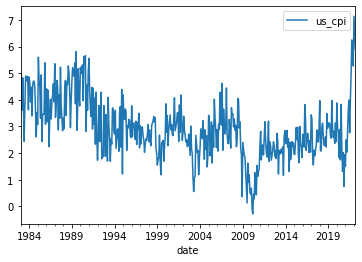

In [6]:
# Create a line plot showing CPI over the years

us_cpi_df.plot.line()

In [7]:
# In which months do we see both inflation and unemployment both in the top 10% of their historical values?
df = us_unemployment_df.join(us_cpi_df).dropna()
df[df > df.quantile(0.9)].dropna()

,us_unemployment,us_cpi
date,,
1983-01-01,10.4,5.014653
1983-02-01,10.4,4.952545
1983-04-01,10.2,4.828054
1983-08-01,9.5,4.896990
1983-09-01,9.2,4.837828
1983-10-01,8.8,4.709707


<AxesSubplot:ylabel='Frequency'>

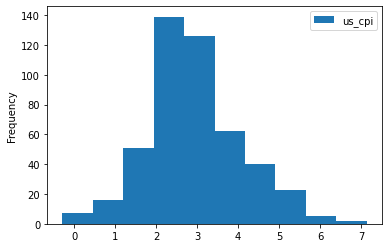

In [8]:
# Create a histogram, based on inflation per month.  Historically, what level has
# US inflation been at most often?

us_cpi_df.plot.hist()

<AxesSubplot:xlabel='us_cpi', ylabel='us_unemployment'>

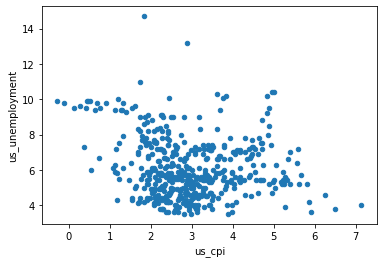

In [9]:
# Create a scatter plot between unemployment and inflation. Do we see the famous "Phillips curve,"
# in which low unemployment is correlated with high inflation?

df = us_unemployment_df.join(us_cpi_df).dropna()
df.plot.scatter(x='us_cpi', y='us_unemployment')

In [10]:
# Do we see a numeric correlation between unemployment and inflation?
df.corr()

,us_unemployment,us_cpi
us_unemployment,1.000000,-0.185177
us_cpi,-0.185177,1.000000


In [27]:
# What was the US GDP each quarter?

us_gdp_df = pd.read_csv('../data/us_gdp.csv',
                        index_col=0, 
                        names=['date', 'us_gdp'],
                        header=0,
                        parse_dates=[0])

us_gdp_df.head()

,us_gdp
date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


In [28]:
# Show the quarterly change in GDP, as a percentage
us_gdp_df.pct_change()

,us_gdp
date,
1947-01-01,NaN
1947-04-01,0.011531
1947-07-01,0.014705
1947-10-01,0.040708
1948-01-01,0.023088
...,...
2020-10-01,0.016038
2021-01-01,0.026103
2021-04-01,0.031887


In [29]:
# Show the annual change (as of January 1st) in GDP, as a percentage.
us_gdp_df[us_gdp_df.index.month == 1].pct_change()

,us_gdp
date,
1947-01-01,NaN
1948-01-01,0.092851
1949-01-01,0.034966
1950-01-01,0.021066
1951-01-01,0.196462
...,...
2017-01-01,0.039544
2018-01-01,0.051676
2019-01-01,0.042588


In [30]:
# When (if ever) was the annual change in GDP negative?
df = us_gdp_df[us_gdp_df.index.month == 1].pct_change()
df[df['us_gdp'] < 0]

,us_gdp
date,
1954-01-01,-0.006792
1958-01-01,-0.004766
2009-01-01,-0.018742


<AxesSubplot:xlabel='date'>

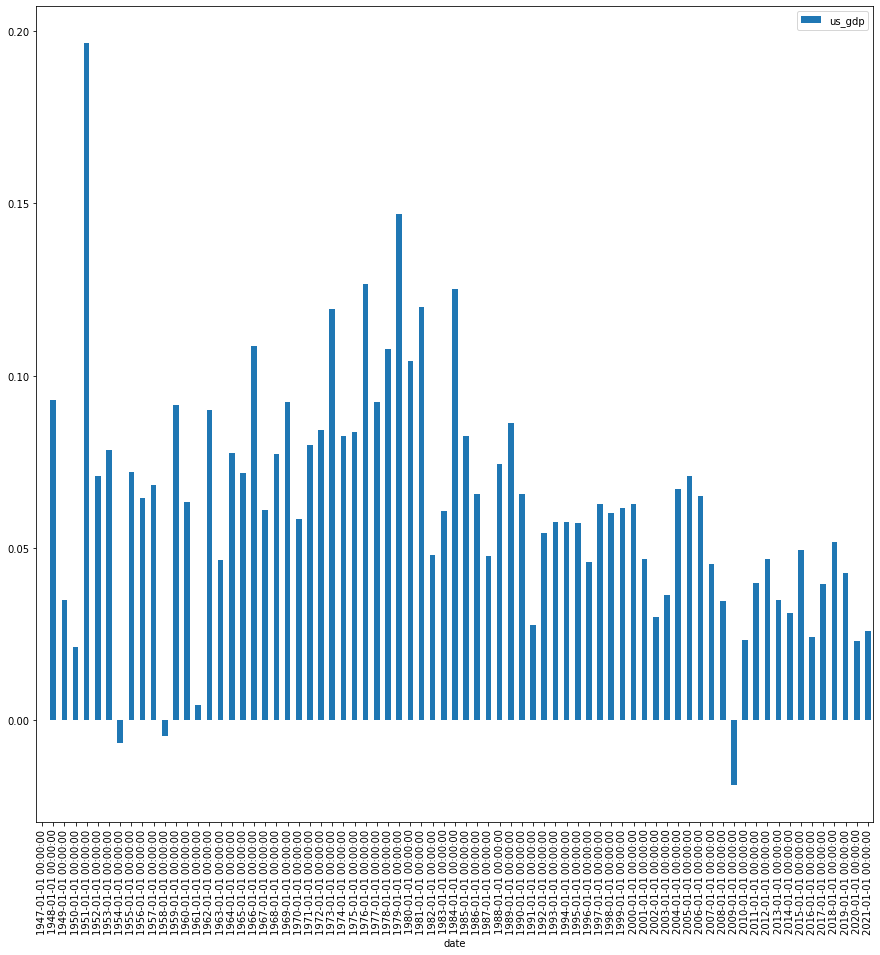

In [31]:
# Show a bar plot of annual GDP change
us_gdp_df[us_gdp_df.index.month == 1].pct_change().plot.bar(figsize=(15,15))

In [32]:
# Read European GDP rates into a data frame.

eu_gdp_df = pd.read_csv('../data/eu_gdp.csv',
                        index_col=0, 
                        names=['date', 'eu_gdp'],
                        header=0,
                        parse_dates=[0])


eu_gdp_df.head()

,eu_gdp
date,
1995-01-01,1552356.9
1995-04-01,1570790.8
1995-07-01,1598186.5
1995-10-01,1617057.9
1996-01-01,1634593.4


In [33]:
eu_gdp_df.pct_change()

,eu_gdp
date,
1995-01-01,NaN
1995-04-01,0.011875
1995-07-01,0.017441
1995-10-01,0.011808
1996-01-01,0.010844
...,...
2020-10-01,0.005066
2021-01-01,0.008767
2021-04-01,0.024437


In [34]:
# How correlated are European and US GDP?

us_gdp_df.pct_change().join(eu_gdp_df.pct_change()).dropna().corr()

,us_gdp,eu_gdp
us_gdp,1.000000,0.900991
eu_gdp,0.900991,1.000000


<AxesSubplot:xlabel='us_gdp', ylabel='eu_gdp'>

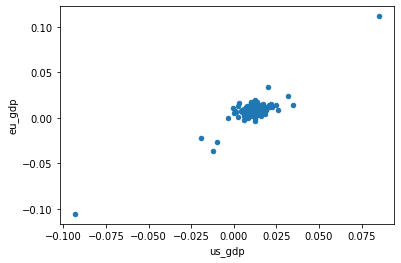

In [35]:
# Create a scatter plot comparing European and US GDP. 
us_gdp_df.pct_change().join(eu_gdp_df.pct_change()).dropna().plot.scatter(x='us_gdp', y='eu_gdp')